In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
filepath = '/content/gdrive/MyDrive' + '/Colab Notebooks/csv/'
mnist = np.load(filepath+'mnist.npz')

x_train = (mnist['x_train'] - np.mean(mnist['x_train'])) / np.std(mnist['x_train'])
y_train = mnist['y_train']
x_test = (mnist['x_test'] - np.mean(mnist['x_train'])) / np.std(mnist['x_train'])
y_test = mnist['y_test']
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

Mounted at /content/gdrive
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [2]:
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    for i in range(len(x)):
        exp_x[i] /= (np.sum(exp_x[i]) + 1e-9)
    return exp_x

def hypothesis(w, x, b):
    return softmax(x.dot(w) + b)

def cross_entropy(y_true, y_pred): 
    y_true = np.argmax(y_true, axis=-1)
    y_pred = y_pred[np.arange(y_true.shape[0]), y_true]
    return -np.mean(np.log(y_pred + 1e-8))

def to_onehot(labels, num_classes):
    return np.eye(num_classes)[labels]

In [3]:
y_train_onehot = to_onehot(y_train, 10)
y_test_onehot = to_onehot(y_test, 10)

print(y_train_onehot.shape, y_test_onehot.shape)

(60000, 10) (10000, 10)


In [4]:
x_train_small = x_train[:, ::4, ::4].reshape(-1, 7*7)
x_test_small = x_test[:, ::4, ::4].reshape(-1, 7*7)

print(x_train_small.shape, x_test_small.shape)

(60000, 49) (10000, 49)


In [5]:
w = np.random.rand(7*7, 10)
b = np.random.rand(10,)

print(w.shape, b.shape)

(49, 10) (10,)


In [6]:
epoch = 1000
alpha = 3e-4

total_loss = []
for i in range(epoch):
    h = hypothesis(w, x_train_small, b)
    loss = cross_entropy(y_train_onehot, h)
    grad = x_train_small.transpose().dot((h - y_train_onehot))

    for j in range(10):    
        w[:, j] = w[:, j] - alpha * np.mean(grad[:, j])
        b[j] = b[j] - alpha * np.mean((h - y_train_onehot)[:, j])
                                      
    if i % 50 == 0:
        print(f"[Epoch : {i:3d}] Loss : {loss:.10f}")
    total_loss.append(loss)
total_loss = np.array(total_loss)

[Epoch :   0] Loss : 7.2131067477
[Epoch :  50] Loss : 4.5439853281
[Epoch : 100] Loss : 4.0787006032
[Epoch : 150] Loss : 4.1102774546
[Epoch : 200] Loss : 4.1058728590
[Epoch : 250] Loss : 4.1037148435
[Epoch : 300] Loss : 4.1013925439
[Epoch : 350] Loss : 4.0990668765
[Epoch : 400] Loss : 4.0967347641
[Epoch : 450] Loss : 4.0944001783
[Epoch : 500] Loss : 4.0920651666
[Epoch : 550] Loss : 4.0897309527
[Epoch : 600] Loss : 4.0873982447
[Epoch : 650] Loss : 4.0850674642
[Epoch : 700] Loss : 4.0827388637
[Epoch : 750] Loss : 4.0804125955
[Epoch : 800] Loss : 4.0780887527
[Epoch : 850] Loss : 4.0757673934
[Epoch : 900] Loss : 4.0734485545
[Epoch : 950] Loss : 4.0711322605


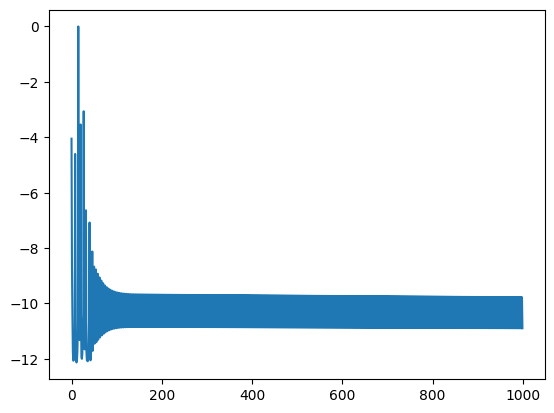

In [7]:
plt.plot(10.0 * np.log(total_loss / (np.max(total_loss + 1e-9))))
plt.show()

In [8]:
from sklearn.metrics import accuracy_score

y_pred_onehot = hypothesis(w, x_test_small, b)
y_pred = np.argmax(y_pred_onehot, axis=-1)
acc = accuracy_score(y_test, y_pred)

print(acc)

0.1737
